In [ ]:
#pip install --upgrade google-cloud-talent
#pip install --upgrade google-api-python-client
#pip install folium


In [471]:
%matplotlib inline

#Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import requests
import json
from config import api_key
import seaborn as sns
import scipy.stats
from collections import Counter

# Stack Overflow Developer Surveys

### Work through the Data

In [472]:
#read the csv file
dev_survey2018= pd.read_csv('./resources/developer_survey_2018/survey_results_public2018.csv')
dev_survey2019= pd.read_csv('./resources/developer_survey_2019/survey_results_public2019.csv')

#print shape of the data sets
print("The 2018 dataset contains ", np.shape(dev_survey2018)[0], " rows and ", np.shape(dev_survey2018)[1], " columns.")
print("The 2019 dataset contains ", np.shape(dev_survey2019)[0], " rows and ", np.shape(dev_survey2019)[1], " columns.")

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The 2018 dataset contains  98855  rows and  129  columns.
The 2019 dataset contains  88883  rows and  85  columns.


In [649]:
#print columns names 2018
list(dev_survey2019.columns.values)
dev_survey2019.head()

,Respondent,Hobbyist,Country,Employment,EduOther,DevType,YearsCode,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,Gender,Age
1,2,No,Bosnia and Herzegovina,"Not employed, but looking for work",Taken an online course in programming or softw...,"Developer, desktop or enterprise applications;...",NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Django,Django,NaN,NaN,Atom;PyCharm,Man,19.0
2,3,Yes,Thailand,Employed full-time,"Taught yourself a new language, framework, or ...","Designer;Developer, back-end;Developer, front-...",3,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,Other(s):,NaN,NaN,Vim;Visual Studio Code,Man,28.0
3,4,No,United States,Employed full-time,Taken an online course in programming or softw...,"Developer, full-stack",3,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Man,22.0
4,5,Yes,Ukraine,Employed full-time,Taken an online course in programming or softw...,"Academic researcher;Developer, desktop or ente...",16,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Man,30.0
5,6,Yes,Canada,Employed full-time,Taken an online course in programming or softw...,Data or business analyst;Data scientist or mac...,13,Java;R;SQL,Python;Scala;SQL,MongoDB;PostgreSQL,PostgreSQL,NaN,NaN,Hadoop,Hadoop;Pandas;TensorFlow;Unity 3D,Android Studio;Eclipse;PyCharm;RStudio;Visual ...,Man,28.0


In [474]:
#Keep only columns needed
dev_survey2018=dev_survey2018[['Respondent','Hobby', 'Country', 'Employment','DevType', 'YearsCoding', 'EducationTypes',
                              'SelfTaughtTypes','TimeAfterBootcamp', 'HackathonReasons', 'LanguageWorkedWith','LanguageDesireNextYear',
                              'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE',
                              'Gender', 'Age']]
dev_survey2019=dev_survey2019[['Respondent', 'Hobbyist','Country', 'Employment', 'EduOther', 'DevType', 'YearsCode', 'LanguageWorkedWith', 'LanguageDesireNextYear', 
                              'DatabaseWorkedWith', 'DatabaseDesireNextYear','WebFrameWorkedWith', 'WebFrameDesireNextYear',
                              'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'Gender', 'Age']]
dev_survey2019.columns

Index(['Respondent', 'Hobbyist', 'Country', 'Employment', 'EduOther',
       'DevType', 'YearsCode', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'Gender', 'Age'],
      dtype='object')

In [475]:
#remove rows where DevType is missing
dev_survey2018=dev_survey2018[pd.notnull(dev_survey2018['DevType'])]
dev_survey2019=dev_survey2019[pd.notnull(dev_survey2019['DevType'])]

#print size of reduced dataset
print("The 2018 dataset contains ", np.shape(dev_survey2018)[0], " rows and ", np.shape(dev_survey2018)[1], " columns.")
print("The 2019 dataset contains ", np.shape(dev_survey2019)[0], " rows and ", np.shape(dev_survey2019)[1], " columns.")

The 2018 dataset contains  92098  rows and  19  columns.
The 2019 dataset contains  81335  rows and  18  columns.


In [476]:
#Show the descriptive statistics for 2018
dev_survey2018.drop(['Respondent'], axis=1).describe()

,Hobby,Country,Employment,DevType,YearsCoding,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,Gender,Age
count,92098,92098,90782,92098,92021,66698,56332,6551,25369,76865,71909,65403,56757,51054,54550,74054,63321,63423
unique,2,181,6,9568,11,494,470,8,127,26079,28111,6837,9967,1008,1781,7822,15,7
top,Yes,United States,Employed full-time,Back-end developer,3-5 years,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,I already had a full-time job as a developer w...,To improve my general technical skills or prog...,C#;JavaScript;SQL;HTML/CSS;HTML/CSS,Python,MySQL,MySQL,.NET Core,Node.js;React,Visual Studio;Visual Studio Code,Male,25 - 34 years old
freq,74661,19390,67227,6417,22918,6708,3377,2987,3124,1339,865,5840,2827,4434,3774,2518,58426,31277


In [477]:
#Show the descriptive statistics for 2019
dev_survey2019.drop(['Respondent'], axis=1).describe(include = 'all')

,Hobbyist,Country,Employment,EduOther,DevType,YearsCode,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,Gender,Age
count,81335,81335,81335,77904,81335,80974,80532,77391,71290,64804,61434,59232,55617,60136,80359,78788,73565.000000
unique,2,176,4,492,13141,52,18752,25421,3431,3858,2104,2241,2657,5371,7273,7,NaN
top,Yes,United States,Employed full-time,"Taught yourself a new language, framework, or ...","Developer, full-stack",10,HTML/CSS;JavaScript;PHP;SQL,Python,Microsoft SQL Server,PostgreSQL,jQuery,React.js,Node.js,Node.js,Visual Studio Code,Man,NaN
freq,64855,19402,63192,5761,8433,6493,1430,1096,4974,3354,3679,3581,9913,6467,4691,71987,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.699829
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.649460
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000


In [478]:
#Top 10 value counts for Dev Environment
dev_survey2018['IDE'].value_counts().nlargest(10)

Visual Studio;Visual Studio Code              2518
Notepad++;Visual Studio;Visual Studio Code    2431
Notepad++;Visual Studio                       2310
Visual Studio                                 1988
Vim                                           1939
Visual Studio Code                            1742
Sublime Text                                  1613
Atom                                           914
IntelliJ                                       862
Notepad++                                      697
Name: IDE, dtype: int64

In [479]:
#Top 10 value counts for Dev Environment
dev_survey2019['DevEnviron'].value_counts().nlargest(10)

Visual Studio Code                            4691
Visual Studio;Visual Studio Code              3620
Notepad++;Visual Studio;Visual Studio Code    3138
Vim                                           2013
Notepad++;Visual Studio                       1848
Visual Studio                                 1583
Vim;Visual Studio Code                        1527
Sublime Text                                  1268
IntelliJ;Visual Studio Code                   1197
Sublime Text;Visual Studio Code               1066
Name: DevEnviron, dtype: int64

In [480]:
#Top 20 value counts for DevType
dev_survey2018['DevType'].value_counts().nlargest(20)

Back-end developer                                                                                          6417
Full-stack developer                                                                                        6104
Back-end developer;Front-end developer;Full-stack developer                                                 4460
Mobile developer                                                                                            3518
Student                                                                                                     3222
Back-end developer;Full-stack developer                                                                     3128
Front-end developer                                                                                         2608
Front-end developer;Full-stack developer                                                                    1117
Back-end developer;Front-end developer                                                          

In [481]:
#Top 20 value counts for DevType
dev_survey2019['DevType'].value_counts().nlargest(20)

Developer, full-stack                                                                                           8433
Developer, back-end                                                                                             4913
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2399
Developer, front-end                                                                                            2212
Developer, mobile                                                                                               2172
Developer, back-end;Developer, full-stack                                                                       2047
Student                                                                                                         1515
Developer, front-end;Developer, full-stack                                                                      1023
Developer, desktop or enterprise applications                   

In [482]:
#Value counts for gender
dev_survey2018['Gender'].value_counts()

Male                                                                         58426
Female                                                                        3930
Non-binary, genderqueer, or gender non-conforming                              272
Female;Transgender                                                             143
Male;Non-binary, genderqueer, or gender non-conforming                         127
Transgender                                                                    103
Female;Male                                                                     97
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       48
Male;Transgender                                                                29
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            23
Fema

In [483]:
#Value counts for gender
dev_survey2019['Gender'].value_counts()

Man                                                            71987
Woman                                                           5810
Non-binary, genderqueer, or gender non-conforming                512
Man;Non-binary, genderqueer, or gender non-conforming            164
Woman;Non-binary, genderqueer, or gender non-conforming          147
Woman;Man                                                        113
Woman;Man;Non-binary, genderqueer, or gender non-conforming       55
Name: Gender, dtype: int64

In [484]:
#Value counts for age
dev_survey2018['Age'].value_counts()

25 - 34 years old     31277
18 - 24 years old     15022
35 - 44 years old     11250
45 - 54 years old      3209
Under 18 years old     1592
55 - 64 years old       908
65 years or older       165
Name: Age, dtype: int64

In [485]:
#Value counts for age
dev_survey2019['Age'].value_counts()

25.0    4522
27.0    4314
26.0    4290
28.0    4283
24.0    4268
30.0    3963
29.0    3909
23.0    3854
22.0    3070
32.0    3001
31.0    2995
33.0    2657
34.0    2344
21.0    2325
35.0    2320
36.0    2035
37.0    1753
38.0    1704
20.0    1667
39.0    1357
40.0    1348
19.0    1080
42.0     987
41.0     953
43.0     817
18.0     711
44.0     670
45.0     666
46.0     512
48.0     494
        ... 
90.0       1
61.3       1
17.3       1
4.0        1
26.3       1
81.0       1
31.4       1
24.8       1
33.5       1
19.9       1
46.5       1
20.9       1
84.0       1
98.9       1
5.0        1
19.5       1
85.0       1
80.0       1
36.8       1
57.9       1
33.6       1
94.0       1
37.3       1
22.5       1
23.9       1
97.0       1
29.5       1
77.0       1
37.5       1
30.8       1
Name: Age, Length: 114, dtype: int64

In [486]:
#Value counts for Education Types
dev_survey2018['EducationTypes'].value_counts().nlargest(10)

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                 6708
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                     4381
Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software                                                                                                                             3994
Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course                                                                                                            2336
Taken an onl

In [487]:
#Value counts for Education Types
dev_survey2019['EduOther'].value_counts().nlargest(10)

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                         5761
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                             5277
Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software                                                                                                                                     3407
Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course                         

In [488]:
#Value counts for LanguageWorkedWith
dev_survey2018['LanguageWorkedWith'].value_counts().nlargest(10)

C#;JavaScript;SQL;HTML/CSS;HTML/CSS                1339
JavaScript;PHP;SQL;HTML/CSS;HTML/CSS               1228
Java                                               1011
JavaScript;HTML/CSS;HTML/CSS                        870
C#;JavaScript;SQL;TypeScript;HTML/CSS;HTML/CSS      828
JavaScript;PHP;SQL;HTML/CSS;HTML/CSS;Bash/Shell     764
JavaScript;PHP;HTML/CSS;HTML/CSS                    713
Java;JavaScript;SQL;HTML/CSS;HTML/CSS               527
C#                                                  471
JavaScript;TypeScript;HTML/CSS;HTML/CSS             390
Name: LanguageWorkedWith, dtype: int64

In [489]:
#Value counts for LanguageWorkedWith
dev_survey2019['LanguageWorkedWith'].value_counts().nlargest(10)

HTML/CSS;JavaScript;PHP;SQL              1430
C#;HTML/CSS;JavaScript;SQL               1392
HTML/CSS;JavaScript                      1161
C#;HTML/CSS;JavaScript;SQL;TypeScript     980
HTML/CSS;JavaScript;PHP                   870
Java                                      828
HTML/CSS;JavaScript;TypeScript            687
HTML/CSS;Java;JavaScript;SQL              653
Python                                    606
C#                                        514
Name: LanguageWorkedWith, dtype: int64

In [490]:
#Value counts for LanguageDesireNextYear
dev_survey2018['LanguageDesireNextYear'].value_counts().nlargest(10)

Python                                            865
C#;JavaScript;SQL;TypeScript;HTML/CSS;HTML/CSS    605
Java                                              593
C#                                                574
JavaScript;HTML/CSS;HTML/CSS                      543
C#;JavaScript;SQL;HTML/CSS;HTML/CSS               541
Go                                                439
Swift                                             438
Kotlin                                            430
JavaScript;TypeScript;HTML/CSS;HTML/CSS           428
Name: LanguageDesireNextYear, dtype: int64

In [491]:
#Value counts for LanguageDesireNextYear
dev_survey2019['LanguageDesireNextYear'].value_counts().nlargest(10)

Python                                   1096
HTML/CSS;JavaScript                       655
HTML/CSS;JavaScript;TypeScript            631
C#;HTML/CSS;JavaScript;SQL                559
C#;HTML/CSS;JavaScript;SQL;TypeScript     559
C#                                        548
Java                                      519
HTML/CSS;JavaScript;PHP;SQL               519
Go                                        408
Swift                                     371
Name: LanguageDesireNextYear, dtype: int64

In [492]:
#Top 10 value counts for DatabaseWorkedWith
dev_survey2018['DatabaseWorkedWith'].value_counts().nlargest(10)

MySQL                         5840
Microsoft SQL Server          4999
Microsoft SQL Server;MySQL    2963
PostgreSQL                    2057
MySQL;PostgreSQL              1386
SQLite                        1295
MongoDB;MySQL                 1174
MongoDB                       1171
MySQL;MariaDB                 1046
MySQL;SQLite                   970
Name: DatabaseWorkedWith, dtype: int64

In [493]:
#Top 10 value counts for DatabaseWorkedWith
dev_survey2019['DatabaseWorkedWith'].value_counts().nlargest(10)

Microsoft SQL Server          4974
MySQL                         4829
PostgreSQL                    2467
Microsoft SQL Server;MySQL    1760
SQLite                        1735
MySQL;SQLite                  1395
MongoDB                       1216
MariaDB;MySQL                 1200
Oracle                        1162
MySQL;PostgreSQL              1086
Name: DatabaseWorkedWith, dtype: int64

In [494]:
#Top 10 value counts for DatabaseDesireNextYear
dev_survey2018['DatabaseDesireNextYear'].value_counts().nlargest(10)

MySQL                                                                2827
PostgreSQL                                                           2525
Microsoft SQL Server                                                 2369
MongoDB                                                              2058
Microsoft SQL Server;MySQL                                           1102
Microsoft SQL Server;Microsoft Azure (Tables, CosmosDB, SQL, etc)     915
MongoDB;MySQL                                                         894
SQLite                                                                799
Redis;PostgreSQL                                                      697
MySQL;PostgreSQL                                                      644
Name: DatabaseDesireNextYear, dtype: int64

In [495]:
#Top 10 value counts for DatabaseDesireNextYear
dev_survey2019['DatabaseDesireNextYear'].value_counts().nlargest(10)

PostgreSQL              3354
Microsoft SQL Server    3150
MySQL                   2659
MongoDB                 2069
SQLite                  1307
PostgreSQL;Redis        1114
Firebase                1025
PostgreSQL;SQLite        961
Other(s):                909
MongoDB;MySQL            835
Name: DatabaseDesireNextYear, dtype: int64

### Create data subsets

In [496]:
#create datasets for all dev types that include data
dev_da_survey2018=dev_survey2018[dev_survey2018['DevType'].str.contains('Data|analyst|scientist') == True]
print('There are ', len(dev_da_survey2018), ' rows in the data|analyst|scientist sub dataset ')

There are  21889  rows in the data|analyst|scientist sub dataset 


In [497]:
#create datasets for all dev types that include data
dev_da_survey2019=dev_survey2019[dev_survey2019['DevType'].str.contains('Data|analyst|scientist') == True]
print('There are ', len(dev_da_survey2019), ' rows in the data|analyst|scientist sub dataset ')

There are  17305  rows in the data|analyst|scientist sub dataset 


In [498]:
#simplify the columns with multiple entries 2018 dataset
def simplify_gender2018(df):
    gender_conditions=[(df['Gender'] == 'Male'),
                      (df['Gender'] == 'Female'),
                      (df['Gender'] != 'Male') & (df['Gender'] != 'Female')
                      & (pd.isnull(df['Gender']) == False)]
    gender_choices = ['Male', 'Female', 'Other']
    df['simple_gender'] = np.select(gender_conditions, gender_choices, default = np.NaN)
    return df
dev_da_survey2018 = simplify_gender2018(dev_da_survey2018)
dev_da_survey2018.simple_gender.head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1     Male
4     Male
5     Male
8     Male
10     nan
Name: simple_gender, dtype: object

In [499]:
#simplify the columns with multiple entries 2019 dataset
def simplify_gender2019(df):
    gender_conditions=[(df['Gender'] == 'Man'),
                      (df['Gender'] == 'Woman'),
                      (df['Gender'] != 'Man') & (df['Gender'] != 'Woman')
                      & (pd.isnull(df['Gender']) == False)]
    gender_choices = ['Male', 'Female', 'Other']
    df['simple_gender'] = np.select(gender_conditions, gender_choices, default = np.NaN)
    return df
dev_da_survey2019 = simplify_gender2019(dev_da_survey2019)
dev_da_survey2019.simple_gender.head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5       Male
8       Male
9        nan
11    Female
12      Male
Name: simple_gender, dtype: object

In [500]:
#change ages in 2019 dataset to same bands as 2018 dataset
age_bins = [0, 17, 24, 34, 44, 54, 64, np.inf]
age_bin_names = ['under 18 years old', '18 - 24 years old', '25 - 34 years old', '35 - 44 years old', '45 - 54 years old','55 - 64 years old','65 years or older']

dev_da_survey2019['AgeRange'] = pd.cut(dev_da_survey2019['Age'], age_bins, labels=age_bin_names)
dev_da_survey2019['AgeRange'].head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


5     25 - 34 years old
8     18 - 24 years old
9                   NaN
11    18 - 24 years old
12    25 - 34 years old
Name: AgeRange, dtype: category
Categories (7, object): [under 18 years old < 18 - 24 years old < 25 - 34 years old < 35 - 44 years old < 45 - 54 years old < 55 - 64 years old < 65 years or older]

In [501]:
#change ages in 2019 dataset to same bands as 2018 dataset
dev_da_survey2019['YearsCode'] = pd.to_numeric(dev_da_survey2019['YearsCode'], errors='coerce') #YearsCode is an object type, need to change it to float

years_code_bins = [0, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, np.inf]
years_code_bin_names = ['0 - 2 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', '12 - 14 years','15 - 17 years','18 - 20 years','21 - 23 years','24 - 26 years','27 - 29 years','30 or more years']

dev_da_survey2019['YearsCodeRange'] = pd.cut(dev_da_survey2019['YearsCode'], years_code_bins, labels=years_code_bin_names)
dev_da_survey2019['YearsCodeRange']
dev_da_survey2019['YearsCodeRange'].value_counts()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


3 - 5 years         3079
6 - 8 years         2993
9 - 11 years        2421
30 or more years    1650
12 - 14 years       1564
18 - 20 years       1465
15 - 17 years       1449
0 - 2 years          800
24 - 26 years        746
21 - 23 years        598
27 - 29 years        283
Name: YearsCodeRange, dtype: int64

In [502]:
#split multi-selection fields
#create dataframe containing the split string values by respondent number
def split_list(df, col):
    in_res = list(df['Respondent'])
    in_list = list(df[col])
    
    out_res = []
    out_list = []
    
    for i in range(len(in_list)):
        if pd.isnull(in_list[i]) == False:
            vals = in_list[i].split(';')
            res = [in_res[i]]*len(vals)
            
            out_list.append(vals)
            out_res.append(res)
            
    out_df = pd.DataFrame({'Respondent': list(np.concatenate(out_res)), col: list(np.concatenate(out_list))})
    return out_df

In [503]:
# Split Education Types
ed_types_2018 = split_list(dev_da_survey2018, 'EducationTypes')
ed_types_2019 = split_list(dev_da_survey2019, 'EduOther')
ed_types_2018['EducationTypes'].value_counts()

#rename 2019 column to use the function
ed_types_2019.rename(columns={'EduOther': 'EducationTypes'}, inplace=True)

#simply the category labels
def convert_ed_type(df):
    conditions_edtype = [(df['EducationTypes'] == 'Taught yourself a new language, framework, or tool without taking a formal course'),
                        (df['EducationTypes'] == 'Taken an online course in programming or software development (e.g. a MOOC)'),
                        (df['EducationTypes'] == 'Contributed to open source software'),
                        (df['EducationTypes'] == 'Received on-the-job training in software development'),
                        (df['EducationTypes'] == 'Participated in a hackathon'),
                        (df['EducationTypes'] == 'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)'),
                        (df['EducationTypes'] == 'Taken a part-time in-person course in programming or software development'),
                        (df['EducationTypes'] == 'Completed an industry certification program (e.g. MCPD)'),
                        (df['EducationTypes'] == 'Participated in a full-time developer training program or bootcamp')]
    
    choices_edtype = ['Self Taught', 'Online Course', 'Open Source', 'On-the-job Training', 'Hackathon', 'Online Coding Competion',
                     'Part-time in-person Course', 'Industry Certification','Full time Course/Bootcamp']
    df['EducationTypes_New'] = np.select(conditions_edtype, choices_edtype, default = np.NaN)
    return df



In [504]:
ed_types_2018 = convert_ed_type(ed_types_2018)
ed_types_2018.head()

,Respondent,EducationTypes,EducationTypes_New
0,3,"Taught yourself a new language, framework, or ...",Self Taught
1,3,Contributed to open source software,Open Source
2,7,Taken a part-time in-person course in programm...,Part-time in-person Course
3,7,Received on-the-job training in software devel...,On-the-job Training
4,7,"Taught yourself a new language, framework, or ...",Self Taught


In [505]:
ed_types_2019 = convert_ed_type(ed_types_2019)
ed_types_2019.head()

,Respondent,EducationTypes,EducationTypes_New
0,6,Taken an online course in programming or softw...,Online Course
1,6,Received on-the-job training in software devel...,On-the-job Training
2,6,"Taught yourself a new language, framework, or ...",Self Taught
3,9,Taken an online course in programming or softw...,Online Course
4,9,Participated in a full-time developer training...,Full time Course/Bootcamp


In [506]:
#ed_types_2018['EducationTypes'].value_counts()
ed_types_2019['EducationTypes_New'].value_counts()

Self Taught                   14716
Online Course                 10851
Open Source                    7480
On-the-job Training            6931
Hackathon                      4397
Online Coding Competion        4365
Part-time in-person Course     3821
Industry Certification         3117
Full time Course/Bootcamp      2878
Name: EducationTypes_New, dtype: int64

In [507]:
#split languages worked with and LanguageDesireNextYear
languages_worked_with_2018 = split_list(dev_da_survey2018, 'LanguageWorkedWith')
languages_worked_with_2019 = split_list(dev_da_survey2019, 'LanguageWorkedWith')
languages_desire_2018 = split_list(dev_da_survey2018, 'LanguageDesireNextYear')
languages_desire_2019 = split_list(dev_da_survey2019, 'LanguageDesireNextYear')
database_worked_with_2018 = split_list(dev_da_survey2018, 'DatabaseWorkedWith')
database_worked_with_2019 = split_list(dev_da_survey2019, 'DatabaseWorkedWith')
database_desire_2018 = split_list(dev_da_survey2018, 'DatabaseDesireNextYear')
database_desire_2019 = split_list(dev_da_survey2019, 'DatabaseDesireNextYear')

In [508]:
languages_worked_with_2018.head()

,Respondent,LanguageWorkedWith
0,3,JavaScript
1,3,Python
2,3,Bash/Shell
3,7,C
4,7,C++


### Data Analysis

In [509]:
#compare the distribution of the two subsets for the specified column
#get proportion of dataset by category
def get_proportions(df, col, index_order = None, drop = True, multi = False):
    #summarize by column value
    summary = df[['Respondent', col]].groupby([col]).count()
    
    #drop NaN values
    if drop:
        summary = summary.drop('nan')
    
    #conver sums to proportions
    if multi:
        props = summary/df['Respondent'].nunique()
    else:
        props = summary/summary['Respondent'].sum()
    
    #sort rows in order specified
    if index_order != None:
        props = props.reindex(index_order)
        
    #convert index into column
    props.reset_index(level=0, inplace=True)
    
    return props

In [510]:
#create  summary dataset for comparing the two subsets
def create_summary(df_2018, df_2019, col, index_order = None, drop = True, multi = False):
    #get proportions for each subset
    props_2018 = get_proportions(df_2018, col, index_order, drop, multi)
    props_2019 = get_proportions(df_2019, col, index_order, drop, multi)
    
    #rename respondent column
    props_2018 = props_2018.rename(columns = {'Respondent':'Res2018'})
    props_2019 = props_2019.rename(columns = {'Respondent':'Res2019'})
    
    #merge dataframes
    props_all = pd.merge(props_2019, props_2018, how = 'outer', on = col)
    
    #Replace any missing values with zeros
    props_all = props_all.fillna(0)
    
    return props_all

In [511]:
#create comparison plot
def create_bar_plot(df, col, x_lab, title, rot = 0):
    #change df to long form
    long = pd.melt(df, id_vars=col, var_name='DevType', value_name='Proportion')
    
    #create plot
    sns.factorplot(x=col, y='Proportion', hue='DevType', data=long, kind='bar', legend = False);
    
    #set plot labels
    plt.xlabel(x_lab)
    plt.title(title)
    plt.gca().legend().set_title('')
    
    plt.xticks(rotation=rot)
    

In [512]:
#create summary Gender dataframe
gender_props = create_summary(dev_da_survey2018, dev_da_survey2019, 'simple_gender')
print(gender_props)

  simple_gender  Res2019   Res2018
0        Female  0.06263  0.053179
1          Male  0.92210  0.928922
2         Other  0.01527  0.017899


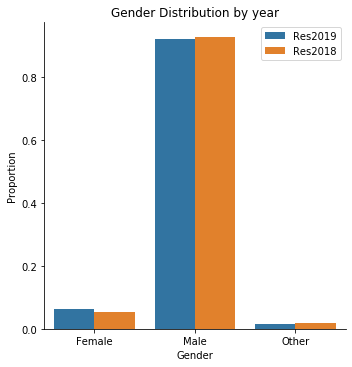

In [651]:
#create comparison plot
create_bar_plot(gender_props, 'simple_gender', 'Gender', 'Gender Distribution by year')
plt.savefig('./images/stackoverflow_gender_distribution.jpg')

In [514]:
#create summary dataframe for age
dev_da_survey2018 = dev_da_survey2018.rename(columns = {'Age':'AgeRange'})
age_props = create_summary(dev_da_survey2018, dev_da_survey2019, 'AgeRange', index_order= ['Under 18 years old', \
                                                                                     '18 - 24 years old', \
                                                                                     '25 - 34 years old', \
                                                                                     '35 - 44 years old', \
                                                                                     '45 - 54 years old', \
                                                                                     '55 - 64 years old', '65 years or older'], drop = False)
print(age_props)

             AgeRange   Res2019   Res2018
0  Under 18 years old  0.000000  0.018865
1   18 - 24 years old  0.212806  0.218016
2   25 - 34 years old  0.464361  0.478656
3   35 - 44 years old  0.212741  0.194643
4   45 - 54 years old  0.072368  0.066319
5   55 - 64 years old  0.024123  0.020089
6   65 years or older  0.003208  0.003413


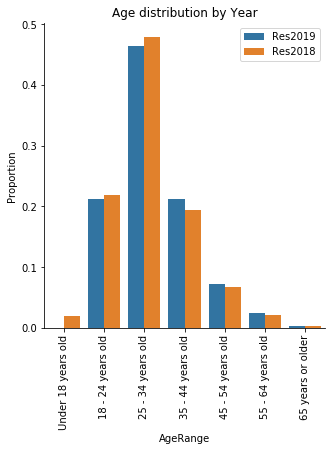

In [652]:
#create comparison plot
create_bar_plot(age_props, 'AgeRange', 'AgeRange', 'Age distribution by Year', rot = 90)
plt.savefig('./images/stackoverflow_age_distribution.jpg')

In [669]:
#create summary dataframe for the education types
self_types_props = create_summary(ed_types_2018, ed_types_2019, 'EducationTypes_New', drop = False, multi = True)

#create a difference plot
self_types_props['Diff'] = self_types_props['Res2019'] - self_types_props['Res2018']
self_types_props.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f','#5fba7d'])#.to_excel('./images/stackoverflow_education_dtypes.xlsx', engine='openpyxl')

,EducationTypes_New,Res2019,Res2018,Diff
0,Full time Course/Bootcamp,0.171565,0.107749,0.0638162
1,Hackathon,0.262116,0.257657,0.00445914
2,Industry Certification,0.185812,0.159549,0.0262637
3,On-the-job Training,0.413174,0.356925,0.0562494
4,Online Coding Competion,0.260209,0.245638,0.0145711
5,Online Course,0.646855,0.519951,0.126904
6,Open Source,0.445902,0.440574,0.00532812
7,Part-time in-person Course,0.227779,0.205064,0.0227154
8,Self Taught,0.877258,0.886272,-0.00901429


In [517]:
#create summary dataframe for languages worked with
language_props = create_summary(languages_worked_with_2018, languages_worked_with_2019, 'LanguageWorkedWith', drop = False, multi = True)

#Create difference plot
language_props['Diff'] = language_props['Res2019'] - language_props['Res2018']
language_props.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f','#5fba7d'])

,LanguageWorkedWith,Res2019,Res2018,Diff
0,Assembly,0.0699003,0.0823668,-0.0124665
1,Bash/Shell,0.43386,0.474764,-0.0409038
2,C,0.207544,0.245597,-0.0380532
3,C#,0.327873,0.366785,-0.0389121
4,C++,0.242815,0.276042,-0.033227
5,Clojure,0.0153909,0.0147122,0.000678694
6,Dart,0.0184224,0,0.0184224
7,Elixir,0.0158573,0,0.0158573
8,Erlang,0.0120679,0.0143363,-0.00226848
9,F#,0.0132338,0.017558,-0.00432415


In [518]:
#get the top 10 languages used for 2018
ctr_2018 = Counter(languages_worked_with_2018['LanguageWorkedWith']).most_common(10)
print(ctr_2018)

top10_2018 = list(list(zip(*ctr_2018))[0])

[('HTML/CSS', 26261), ('SQL', 13807), ('JavaScript', 13106), ('Python', 9441), ('Bash/Shell', 8842), ('Java', 8116), ('PHP', 7168), ('C#', 6831), ('C++', 5141), ('C', 4574)]


In [519]:
#get the top 10 languages used for 2019
ctr_2019 = Counter(languages_worked_with_2019['LanguageWorkedWith']).most_common(10)
print(ctr_2019)

top10_2019 = list(list(zip(*ctr_2019))[0])

[('SQL', 12338), ('JavaScript', 11377), ('HTML/CSS', 11165), ('Python', 9396), ('Bash/Shell', 7442), ('Java', 6379), ('C#', 5624), ('PHP', 5474), ('C++', 4165), ('C', 3560)]


/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


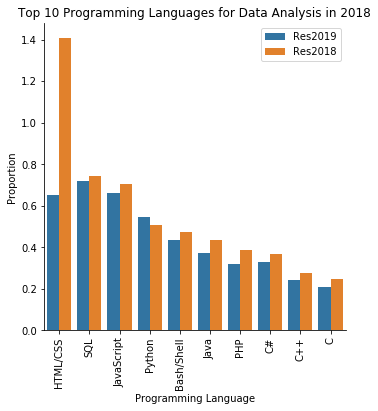

In [676]:
#create top 10 language comparison plot for 2018
top10_props_2018 = language_props[language_props['LanguageWorkedWith'].isin(top10_2018)].sort_values('Res2018', ascending = False)
top10_props_2018.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_props_2018, 'LanguageWorkedWith', 'Programming Language', 
                'Top 10 Programming Languages for Data Analysis in 2018', rot = 90)
plt.savefig('./images/stackoverflow_languages_worked_with_2018.jpg')

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


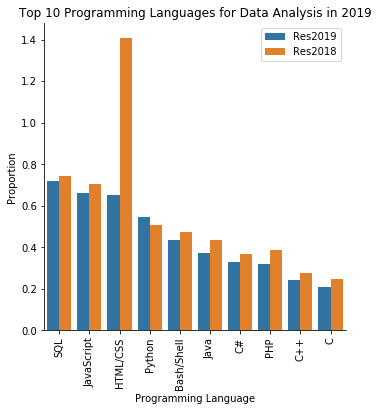

In [677]:
#create top 10 language comparison plot for 2019
top10_props_2019 = language_props[language_props['LanguageWorkedWith'].isin(top10_2019)].sort_values('Res2019', ascending = False)
top10_props_2019.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_props_2019, 'LanguageWorkedWith', 'Programming Language', 
                'Top 10 Programming Languages for Data Analysis in 2019', rot = 90)
plt.savefig('./images/stackoverflow_languages_worked_with_2019.jpg')

In [522]:
#create summary dataframe for languages desired
language_props_desired = create_summary(languages_desire_2018, languages_desire_2019, 'LanguageDesireNextYear', drop = False, multi = True)

#Create difference plot
language_props_desired['Diff'] = language_props_desired['Res2019'] - language_props_desired['Res2018']
language_props_desired.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f','#5fba7d'])


,LanguageDesireNextYear,Res2019,Res2018,Diff
0,Assembly,0.0560044,0.0628913,-0.0068869
1,Bash/Shell,0.321448,0.352708,-0.03126
2,C,0.134544,0.150882,-0.0163375
3,C#,0.28561,0.29803,-0.0124198
4,C++,0.206099,0.22928,-0.0231818
5,Clojure,0.0321327,0.0352076,-0.00307497
6,Dart,0.0478042,0,0.0478042
7,Elixir,0.0399077,0,0.0399077
8,Erlang,0.029217,0.0406639,-0.0114469
9,F#,0.0437344,0.0538166,-0.0100821


In [523]:
#get the top 10 languages desired in 2018
ctr_desired_2018 = Counter(languages_desire_2018['LanguageDesireNextYear']).most_common(10)
print(ctr_desired_2018)

top10_desired_2018 = list(list(zip(*ctr_desired_2018))[0])


[('HTML/CSS', 15704), ('Python', 9482), ('SQL', 9333), ('JavaScript', 9094), ('Bash/Shell', 6141), ('C#', 5189), ('Java', 5127), ('C++', 3992), ('PHP', 3811), ('Go', 3802)]


In [524]:
#get the top 10 languages desired in 2019
ctr_desired_2019 = Counter(languages_desire_2019['LanguageDesireNextYear']).most_common(10)
print(ctr_desired_2019)

top10_desired_2019 = list(list(zip(*ctr_desired_2019))[0])

[('Python', 9888), ('SQL', 9452), ('JavaScript', 8594), ('HTML/CSS', 7501), ('Bash/Shell', 5292), ('C#', 4702), ('Java', 4154), ('TypeScript', 3970), ('C++', 3393), ('Go', 3292)]


/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


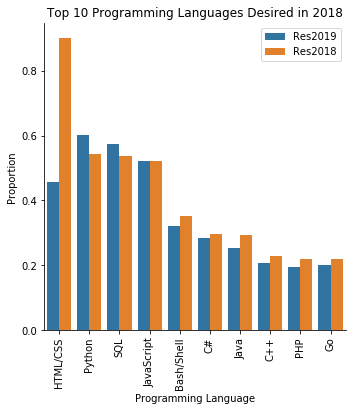

In [678]:
#create top 10 languages desired comparison plot for 2018
top10_desired_props_2018 = language_props_desired[language_props_desired['LanguageDesireNextYear'].isin(top10_desired_2018)].sort_values('Res2018', ascending = False)
top10_desired_props_2018.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_desired_props_2018, 'LanguageDesireNextYear', 'Programming Language', 
                'Top 10 Programming Languages Desired in 2018', rot = 90)
plt.savefig('./images/stackoverflow_languages_desired_2018.jpg')

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


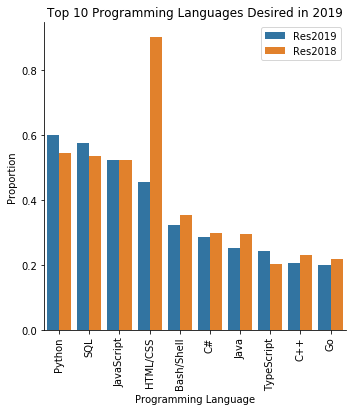

In [679]:
#create top 10 languages desired comparison plot for 2019
top10_desired_props_2019 = language_props_desired[language_props_desired['LanguageDesireNextYear'].isin(top10_desired_2019)].sort_values('Res2019', ascending = False)
top10_desired_props_2019.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_desired_props_2019, 'LanguageDesireNextYear', 'Programming Language', 
                'Top 10 Programming Languages Desired in 2019', rot = 90)
plt.savefig('./images/stackoverflow_languages_desired_2019.jpg')

In [527]:
#create summary dataframe for databases worked with
db_props = create_summary(database_worked_with_2018, database_worked_with_2019, 'DatabaseWorkedWith', drop = False, multi = True)

#Create difference plot
db_props['Diff'] = db_props['Res2019'] - db_props['Res2018']
db_props.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f','#5fba7d'])

,DatabaseWorkedWith,Res2019,Res2018,Diff
0,Cassandra,0.0429683,0.0439276,-0.000959389
1,Couchbase,0.0203864,0,0.0203864
2,DynamoDB,0.060281,0,0.060281
3,Elasticsearch,0.153933,0.144292,0.00964125
4,Firebase,0.106699,0,0.106699
5,MariaDB,0.212019,0.183697,0.0283211
6,Microsoft SQL Server,0.414565,0.483968,-0.0694023
7,MongoDB,0.255802,0.262098,-0.00629544
8,MySQL,0.576967,0.631078,-0.0541117
9,Oracle,0.190629,0.12315,0.0674784


In [528]:
#get the top 10 databases used for 2018
ctr_db_2018 = Counter(database_worked_with_2018['DatabaseWorkedWith']).most_common(10)
print(ctr_db_2018)

top10_db_2018 = list(list(zip(*ctr_db_2018))[0])


[('MySQL', 10746), ('Microsoft SQL Server', 8241), ('PostgreSQL', 6185), ('MongoDB', 4463), ('SQLite', 3693), ('MariaDB', 3128), ('Redis', 3126), ('Elasticsearch', 2457), ('Oracle', 2097), ('Microsoft Azure (Tables, CosmosDB, SQL, etc)', 1613)]


In [529]:
#get the top 10 databases used for 2019
ctr_db_2019 = Counter(database_worked_with_2019['DatabaseWorkedWith']).most_common(10)
print(ctr_db_2019)

top10_db_2019 = list(list(zip(*ctr_db_2019))[0])

[('MySQL', 9198), ('Microsoft SQL Server', 6609), ('PostgreSQL', 6050), ('SQLite', 5605), ('MongoDB', 4078), ('MariaDB', 3380), ('Oracle', 3039), ('Redis', 2974), ('Elasticsearch', 2454), ('Firebase', 1701)]


/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


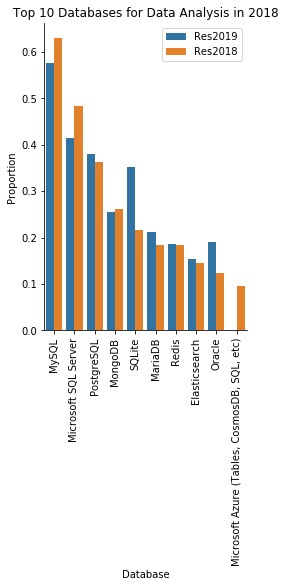

In [680]:
#create top 10 database comparison plot for 2018
top10_db_props_2018 = db_props[db_props['DatabaseWorkedWith'].isin(top10_db_2018)].sort_values('Res2018', ascending = False)
top10_db_props_2018.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_db_props_2018, 'DatabaseWorkedWith', 'Database', 'Top 10 Databases for Data Analysis in 2018', rot = 90)
plt.savefig('./images/stackoverflow_databases_worked_with_2018.jpg')

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


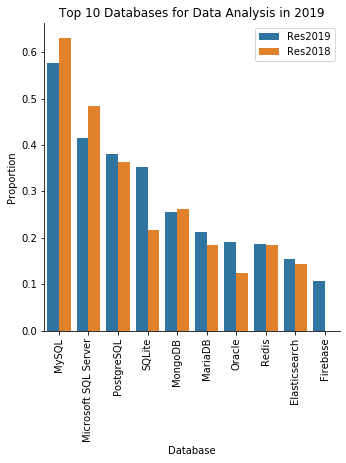

In [681]:
#create top 10 database comparison plot for 2019
top10_db_props_2019 = db_props[db_props['DatabaseWorkedWith'].isin(top10_db_2019)].sort_values('Res2019', ascending = False)
top10_db_props_2019.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_db_props_2019, 'DatabaseWorkedWith', 'Database', 'Top 10 Databases for Data Analysis in 2019', rot = 90)
plt.savefig('./images/stackoverflow_databases_worked_with_2019.jpg')

In [532]:
#create summary dataframe for databases desired
db_props_desired = create_summary(database_desire_2018, database_desire_2019, 'DatabaseDesireNextYear', drop = False, multi = True)

#Create difference plot
db_props_desired['Diff'] = db_props_desired['Res2019'] - db_props_desired['Res2018']
db_props_desired.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f','#5fba7d'])


,DatabaseDesireNextYear,Res2019,Res2018,Diff
0,Cassandra,0.100854,0.106243,-0.00538937
1,Couchbase,0.0393114,0,0.0393114
2,DynamoDB,0.0858072,0,0.0858072
3,Elasticsearch,0.233225,0.243571,-0.0103462
4,Firebase,0.14613,0,0.14613
5,MariaDB,0.18883,0.168545,0.0202856
6,Microsoft SQL Server,0.316321,0.338879,-0.0225576
7,MongoDB,0.332723,0.345705,-0.0129819
8,MySQL,0.410601,0.419539,-0.00893819
9,Oracle,0.135895,0.0916622,0.0442331


In [533]:
#get the top 10 databases desired in 2018
ctr_db_desired_2018 = Counter(database_desire_2018['DatabaseDesireNextYear']).most_common(10)
print(ctr_db_desired_2018)

top10_db_desired_2018 = list(list(zip(*ctr_db_desired_2018))[0])

[('MySQL', 6330), ('PostgreSQL', 5793), ('MongoDB', 5216), ('Microsoft SQL Server', 5113), ('Elasticsearch', 3675), ('Redis', 3590), ('MariaDB', 2543), ('Microsoft Azure (Tables, CosmosDB, SQL, etc)', 2503), ('SQLite', 2384), ('Google Cloud Storage', 2202)]


In [534]:
#get the top 10 databases desired in 2019
ctr_db_desired_2019 = Counter(database_desire_2019['DatabaseDesireNextYear']).most_common(10)
print(ctr_db_desired_2019)

top10_db_desired_2019 = list(list(zip(*ctr_db_desired_2019))[0])

[('PostgreSQL', 6192), ('MySQL', 6058), ('MongoDB', 4909), ('Microsoft SQL Server', 4667), ('SQLite', 4323), ('Redis', 3770), ('Elasticsearch', 3441), ('MariaDB', 2786), ('Firebase', 2156), ('Oracle', 2005)]


/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


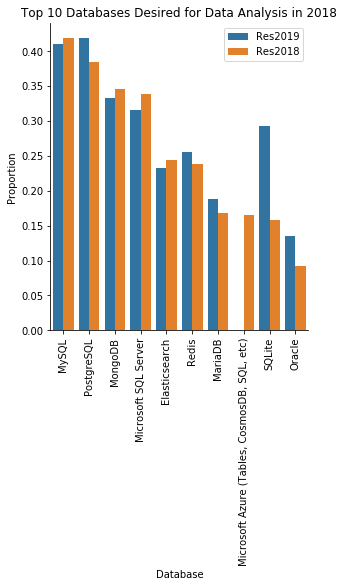

In [682]:
#create top 10 database desired comparison plot for 2018
top10_db_desired_2018 = db_props_desired[db_props_desired['DatabaseDesireNextYear'].isin(top10_db_2018)].sort_values('Res2018', ascending = False)
top10_db_desired_2018.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_db_desired_2018, 'DatabaseDesireNextYear', 'Database', 'Top 10 Databases Desired for Data Analysis in 2018', rot = 90)
plt.savefig('./images/stackoverflow_databases_desired_2018.jpg')

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


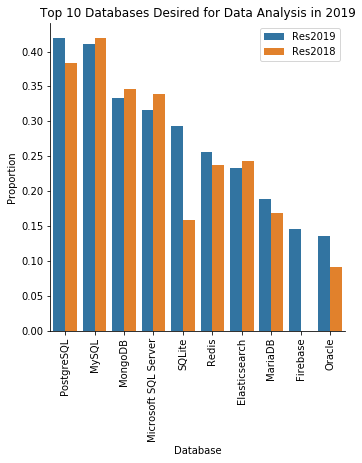

In [683]:
#create top 10 database desired comparison plot for 2019
top10_db_desired_2019 = db_props_desired[db_props_desired['DatabaseDesireNextYear'].isin(top10_db_2019)].sort_values('Res2019', ascending = False)
top10_db_desired_2019.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_db_desired_2019, 'DatabaseDesireNextYear', 'Database', 'Top 10 Databases Desired for Data Analysis in 2019', rot = 90)
plt.savefig('./images/stackoverflow_databases_desired_2019.jpg')

In [537]:
dev_da_survey2018.Country = dev_da_survey2018.Country.fillna('Unknown')
dev_da_survey2019.Country = dev_da_survey2019.Country.fillna('Unknown')
dev_da_survey2018.Country.head()
dev_da_survey2019


#Group the dataset by Country for 2018
country_values_2018 = dev_da_survey2018.groupby('Country', as_index=False)['Respondent'].count()
country_values_2018=country_values_2018.sort_values('Respondent', ascending = False)
#identify top 50 countries in 2018
ctr_countries_2018 = Counter(country_values_2018['Country']).most_common(50)
top50_countries_2018 = list(list(zip(*ctr_countries_2018))[0])
country_values_2018.head()
top50_countries_2018 = country_values_2018[country_values_2018['Country'].isin(top50_countries_2018)].sort_values('Respondent', ascending = False)

#Group the dataset by Country for 2019
country_values_2019 = dev_da_survey2019.groupby('Country', as_index=False)['Respondent'].count()
country_values_2019=country_values_2019.sort_values('Respondent', ascending = False)
#identify top 50 countries in 2018
ctr_countries_2019 = Counter(country_values_2019['Country']).most_common(50)
top50_countries_2019 = list(list(zip(*ctr_countries_2019))[0])
country_values_2019.head()
top50_countries_2019 = country_values_2019[country_values_2019['Country'].isin(top50_countries_2019)].sort_values('Respondent', ascending = False)

#merge dataframes    
#rename respondent column
countries_2018 = top50_countries_2018.rename(columns = {'Respondent':'Res2018'})
countries_2019 = top50_countries_2019.rename(columns = {'Respondent':'Res2019'})
countries_both_years = pd.merge(top50_countries_2019, top50_countries_2018, how = 'outer', on = 'Country')



/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


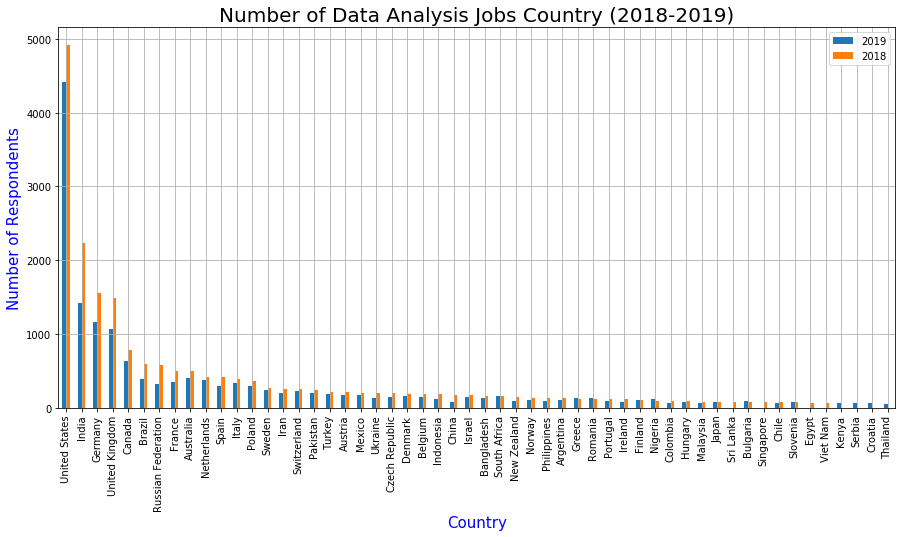

In [688]:
#create bar graph to illustrate number of data analysis respondents per country for 2018
fig, ax = plt.subplots(figsize=(15,7))
grouped_df_country=countries_both_years.sort_values('Respondent_y', ascending = False).reset_index(drop=True)
grouped_df_country.plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs Country (2018-2019)', size=20)
ax.set_xlabel(xlabel='Country', color='b', size=15)
ax.set_ylabel(ylabel='Number of Respondents', color='b', size=15)
ax.set_xticklabels(grouped_df_country.Country)
plt.legend(['2019','2018'])
plt.grid()
#plt.show()
plt.savefig('./images/stackoverflow_jobs_per_country.jpg')

In [695]:
#prepare data for choropleth maps
Total_respondents_2018 = country_values_2018['Respondent'].sum()
Total_respondents_2019 = country_values_2018['Respondent'].sum()
#2018 dataframe with percentages
countries_2018_perc=country_values_2018
countries_2018_perc['perc_2018'] = 100*(country_values_2018['Respondent']/Total_respondents_2018)

#2019 dataframe with percentages
countries_2019_perc=country_values_2019
countries_2019_perc['perc_2019'] = 100*(country_values_2019['Respondent']/Total_respondents_2019)
countries_2019_perc.head()

,Country,Respondent,perc_2019
150,United States,4422,20.201928
63,India,1420,6.487277
52,Germany,1159,5.294897
148,United Kingdom,1063,4.856321
26,Canada,640,2.923843


In [689]:
#Create Choropleth map 2018 data
#Load the shape of the world map
countries_geo = os.path.join('./resources/world-countries.json')
#initialize the map
countries_map = folium.Map(titles="Mapbox Bright",location=[0, 0], zoom_start=2)
#Add the color for the chloropleth

bins = [0, 0.01, 0.05, 0.5, 1.5, 2.5, 3.7, 6, 7, 9, 10.3, 22.5]


countries_map.choropleth(
    geo_data=countries_geo,
    name='choropleth',
    data=countries_2018_perc,
    columns=['Country','perc_2018'],
    #key_on='feature.id',
    key_on='feature.properties.name',
    fill_color='Spectral',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color = 'white',
    bins=bins,
    legend_name="Data Analysis Respondents by Country (2018)"
)
folium.LayerControl().add_to(countries_map)
countries_map.save("./Images/_countrymap2018.html")
countries_map

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [690]:
#Create Choropleth map 2019 data
#Load the shape of the world map

#initialize the map

#Add the color and bins for the chloropleth

bins = [0, 0.01, 0.05, 0.5, 1.5, 2.5, 3.7, 6, 7, 9, 10.3, 22.5]


countries_map.choropleth(
    geo_data=countries_geo,
    name='choropleth',
    data=countries_2019_perc,
    columns=['Country','perc_2019'],
    #key_on='feature.id',
    key_on='feature.properties.name',
    fill_color='Spectral',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color = 'white',
    bins=bins,
    legend_name="Data Analysis Respondents by Country (2018)"
)
folium.LayerControl().add_to(countries_map)
countries_map.save("./Images/_countrymap2019.html")
countries_map

# Science Survey Section

### Investigate data

In [705]:
#read the csv file
data_sci_survey2018= pd.read_csv('./resources/02_data_sci_survey_2018_data.csv')

In [706]:
#print shape of the data sets
print("The 2018 dataset contains ", np.shape(data_sci_survey2018)[0], " rows and ", np.shape(data_sci_survey2018)[1], " columns.")


The 2018 dataset contains  1965  rows and  221  columns.


In [707]:
total_responses = data_sci_survey2018['For you, data analysis is...?'].count()
data_sci_survey2018.describe()

,"""My manager gives me realistic assignments that are relevant to my skills and responsibilities, with a clear and specific description of the requirements."":To what extend do you associate the following phrase with your manager?.."
count,918.000000
mean,3.168845
std,1.263889
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [546]:
#what industry data analysis is done for
analyse_data_for_industry = data_sci_survey2018.groupby('What is the industry you primarily analyze data for?', as_index=False).size()
analyse_data_for_industry

What is the industry you primarily analyze data for?
A non-IT industry    933
IT                   733
dtype: int64

In [644]:
#list the columns
#add JobID column for index
data_sci_survey2018['JobID']=range(1,len(data_sci_survey2018) + 1)
data_sci_survey2018.set_index('JobID')
#list(data_sci_survey2018.columns.values)
data_sci_survey2018.head()

,Type,Data Processing - Involved,Basic Statistics - Involved,Model Design Research - Involved,Model Design Routine Computations - Involved,Model Deployment - Involved,Data Visualization - Involved,Other ... Write In::Which of the following are you involved in?,Data Processing - Interest,Basic statistics:Which of the following are area(s) of interest to you?,...,Business Analyst,Data and Analytics Manager,Researcher,Consultant,General/Product Manager,Other ... Write In:Which of the following best describes your job role(s) regardless of your position level?,What is your manager's level of expertise in data analysis?,"""My manager gives me realistic assignments that are relevant to my skills and responsibilities, with a clear and specific description of the requirements."":To what extend do you associate the following phrase with your manager?..",Other:Are you planning on adopting any other language(s) in the next 12 months?,JobID
0,A secondary/additional activity that you perfo...,Data processing,Basic statistics,NaN,NaN,NaN,Data visualization,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Has basic qualifications in data analysis,2.0,NaN,1
1,A hobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,A hobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,A hobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data processing,Basic statistics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,A secondary/additional activity that you perfo...,Data processing,Basic statistics,NaN,NaN,NaN,Data visualization,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,General/Product Manager,NaN,Has no qualifications in data analysis,2.0,Other,5


/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


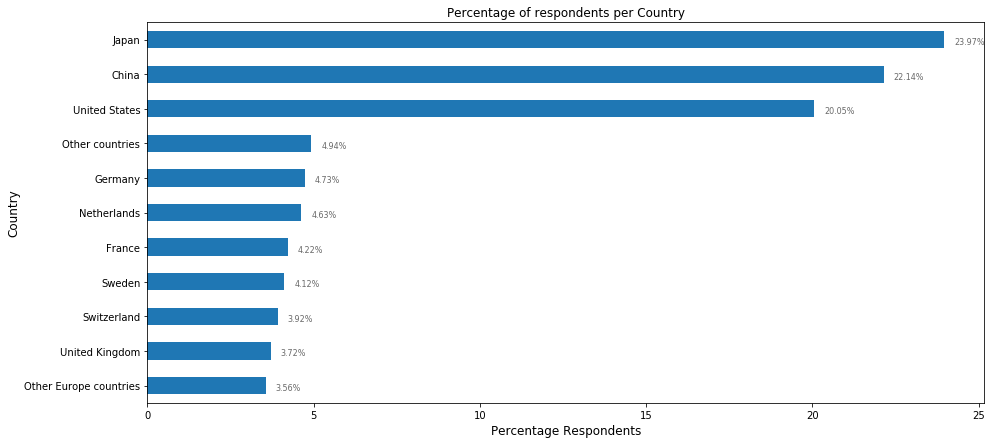

In [700]:
#add columns to be used to new dataset
new_sci_survey2018 = data_sci_survey2018[['JobID','Age Range', 'Country']]

#remove rows with certain values
new_sci_survey2018['Country'] = new_sci_survey2018['Country'].replace([''], 'nan')
new_sci_survey2018_len = len(new_sci_survey2018)
new_sci_survey2018.dropna(subset=['Country'], inplace=True)

#create the plot
ax = (100 * new_sci_survey2018['Country'].value_counts()/len(new_sci_survey2018['JobID'])).plot(kind='barh', fontsize=10, figsize=(15,7), title='Percentage of respondents per Country')
ax.set_alpha(0.8)
ax.set_xlabel('Percentage Respondents', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=8,color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

plt.savefig("./Images/sci_survey_resp_by_country.jpg")


In [691]:
new_sci_survey2018['Country'].value_counts(normalize=True)


Japan                     0.239695
China                     0.221374
United States             0.200509
Other countries           0.049364
Germany                   0.047328
Netherlands               0.046310
France                    0.042239
Sweden                    0.041221
Switzerland               0.039186
United Kingdom            0.037150
Other Europe countries    0.035623
Name: Country, dtype: float64

In [551]:
#rename columns
science_survey_rename1_df=data_sci_survey2018
science_survey_rename1_df.rename(columns={'Developer:Which of the following best describes your job role(s) regardless of your position level?':'Developer',
                                                          'Architect:Which of the following best describes your job role(s) regardless of your position level?':'Architect', 
                                                          'Data Scientist:Which of the following best describes your job role(s) regardless of your position level?':'Data Scientist',
                                                          'Data Analyst:Which of the following best describes your job role(s) regardless of your position level?':'Data Analyst', 
                                                          'Data Architect:Which of the following best describes your job role(s) regardless of your position level?':'Data Architect', 
                                                          'Data Engineer:Which of the following best describes your job role(s) regardless of your position level?':'Data Engineer',
                                                          'Statistician:Which of the following best describes your job role(s) regardless of your position level?':'Statistician',
                                                          'Business Analyst:Which of the following best describes your job role(s) regardless of your position level?':'Business Analyst',
                                                          'Data and Analytics Manager:Which of the following best describes your job role(s) regardless of your position level?':'Data and Analytics Manager',
                                                          'Researcher:Which of the following best describes your job role(s) regardless of your position level?':'Researcher',
                                                          'Consultant:Which of the following best describes your job role(s) regardless of your position level?':'Consultant',
                                                          'General/Product Manager:Which of the following best describes your job role(s) regardless of your position level?':'General/Product Manager', 
                                                          'For you, data analysis is...?':'Type',
                                                          'Data processing:Which of the following are you involved in?':'Data Processing - Involved',
                                                          'Basic statistics:Which of the following are you involved in?':'Basic Statistics - Involved',
                                                          'Model design (research):Which of the following are you involved in?':'Model Design Research - Involved',
                                                          'Model design (routine computations):Which of the following are you involved in?':'Model Design Routine Computations - Involved',
                                                          'Model deployment in production mode:Which of the following are you involved in?':'Model Deployment - Involved',
                                                          'Data visualization:Which of the following are you involved in?':'Data Visualization - Involved',
                                                          'Data processing:Which of the following are area(s) of interest to you?':'Data Processing - Interest',
                                                          'Could you tell us your age range?':'Age Range',
                                                          'What country do you live in?':'Country',
                                                          'What is your main employment status?':'Employment Status',
                                                          'How long have you been working in data analysis?':'Duration Worked in Data Analysis',
                                                          'How long have you been involved in data analysis?':'Duration Involved in Data Analysis',
                                                          'Accounting / Finance / Insurance:Which industry or industries do you primarily analyze data for?':'Accounting/Finance/Insurance',
                                                          'Administration / Management / Business Development:Which industry or industries do you primarily analyze data for?':'Administration/Management/Business Development',
                                                          'Banking / Real Estate / Mortgage Financing:Which industry or industries do you primarily analyze data for?':'Banking/Real Estate/Mortgage Financing',
                                                          'Bioinformatics:Which industry or industries do you primarily analyze data for?':'Bioinformatics',
                                                          'Business / Strategic Management:Which industry or industries do you primarily analyze data for?':'Business/Strategic Management',
                                                          'Construction / Architecture:Which industry or industries do you primarily analyze data for?':'Construction/Architecture',
                                                          'Customer Support:Which industry or industries do you primarily analyze data for?':'Customer Support',
                                                          'Design:Which industry or industries do you primarily analyze data for?':'Design',
                                                          'Education / Training:Which industry or industries do you primarily analyze data for?':'Education/Training',
                                                          'Entertainment / Mass media and information / Publishing:Which industry or industries do you primarily analyze data for?':'Entertainment/Mass media and information/Publishing',
                                                          'Human Resources:Which industry or industries do you primarily analyze data for?':'Human Resources',
                                                          'Law:Which industry or industries do you primarily analyze data for?':'Law',
                                                          'Logistics/ Transportation:Which industry or industries do you primarily analyze data for?':'Logistics/Transportation',
                                                          'Machinery:Which industry or industries do you primarily analyze data for?':'Machinery',
                                                          'Manufacturing:Which industry or industries do you primarily analyze data for?':'Manufacturing',
                                                          'Marketing:Which industry or industries do you primarily analyze data for?':'Marketing',
                                                          'Medicine / Health:Which industry or industries do you primarily analyze data for?':'Medicine/Health',
                                                          'Non-profit:Which industry or industries do you primarily analyze data for?':'Non-profit',
                                                          'Restaurants / Hospitality / Tourism:Which industry or industries do you primarily analyze data for?':'Restaurants/Hospitality/Tourism',
                                                          'Sales / Distribution / Retail:Which industry or industries do you primarily analyze data for?':'Sales/Distribution/Retail',
                                                          'Science:Which industry or industries do you primarily analyze data for?':'Science',
                                                          'Security:Which industry or industries do you primarily analyze data for?':'Security',
                                                          'Service / Maintenance:Which industry or industries do you primarily analyze data for?':'Service/Maintenance',
                                         },
                               inplace=True)
science_survey_rename1_df.columns

Index(['Type', 'Data Processing - Involved', 'Basic Statistics - Involved',
       'Model Design Research - Involved',
       'Model Design Routine Computations - Involved',
       'Model Deployment - Involved', 'Data Visualization - Involved',
       'Other ... Write In::Which of the following are you involved in?',
       'Data Processing - Interest',
       'Basic statistics:Which of the following are area(s) of interest to you?',
       ...
       'Business Analyst', 'Data and Analytics Manager', 'Researcher',
       'Consultant', 'General/Product Manager',
       'Other ... Write In:Which of the following best describes your job role(s) regardless of your position level?',
       'What is your manager's level of expertise in data analysis?',
       '"My manager gives me realistic assignments that are relevant to my skills and responsibilities, with a clear and specific description of the requirements.":To what extend do you associate the following phrase with your manager?..',
   

In [554]:
#create dataframe with required fields for graph
science_survey_df = pd.DataFrame(science_survey_rename1_df, columns=['Data Processing - Interest','Age Range','Country','Employment Status','Duration Worked in Data Analysis','Duration Involved in Data Analysis'])
science_survey_df.head()

,Data Processing - Interest,Age Range,Country,Employment Status,Duration Worked in Data Analysis,Duration Involved in Data Analysis
0,NaN,21-29,United States,Fully employed by a company / organization,1 to 3 years,NaN
1,Data processing,21-29,Japan,Fully employed by a company / organization,NaN,1 to 3 years
2,Data processing,18-20,United Kingdom,Student,NaN,Less than 1 year
3,Data processing,21-29,Japan,Fully employed by a company / organization,NaN,Less than 1 year
4,NaN,21-29,France,Fully employed by a company / organization,Less than 1 year,NaN


In [555]:
science_survey_roles_df=pd.DataFrame(science_survey_rename1_df, columns =['Developer', 'Architect', 'Data Scientist', 'Data Architect','Data Analyst',
                                                                         'Data Engineer', 'Statistician', 'Business Analyst','Data and Analytics Manager',
                                                                          'Researcher', 'Consultant','General/Product Manager' ] )
science_survey_involved_df=pd.DataFrame(science_survey_rename1_df, columns =['Type','Data Visualization - Involved', 'Model Deployment - Involved', 'Model Design Routine Computations - Involved', 
                                                                         'Model Design Research - Involved', 'Basic Statistics - Involved', 'Data Processing - Involved' ] )
science_survey_roles_df.count()
science_survey_involved_df.count()

Type                                            1965
Data Visualization - Involved                    892
Model Deployment - Involved                      311
Model Design Routine Computations - Involved     442
Model Design Research - Involved                 550
Basic Statistics - Involved                      791
Data Processing - Involved                       992
dtype: int64

# Indeed data set

In [710]:
indeed_data = pd.read_csv('./resources/01_indeed_job_dataset.csv')
indeed_data.head()

,id,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Engineer,https://www.indeed.com/rc/clk?jk=5a2a43234c789...,80001-99999,data_scientist,"['Microsoft SQL Server', 'Technical Writing', ...",6,Colorado Community Managed Care Network,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=df00df326efa1...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=fbb4b61d6a578...,140000-159999,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
3,3,Data Scientist,https://www.indeed.com/rc/clk?jk=8b80cf0fbff8c...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
4,4,Data Engineer,https://www.indeed.com/rc/clk?jk=051578f616806...,100000-119999,data_scientist,"['TS/SCI Clearance', 'Signal Processing', 'Mic...",3,DCS Corp,46.0,4.5,...,0,0,0,1,0,0,0,0,0,1


In [711]:
indeed_data['Company_Industry']

0                                                     NaN
1                                   Internet and Software
2                                   Internet and Software
3                                   Internet and Software
4                                   Aerospace and Defense
5                                   Internet and Software
6                                   Internet and Software
7                                   Internet and Software
8                                                     NaN
9                            Banks and Financial Services
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                            Health Care
14                                  Aerospace and Defense
15                               Industrial Manufacturing
16                                  Aerospace and Defense
17            

In [712]:
indeed_data.columns
indeed_data.describe()

,id,No_of_Skills,No_of_Reviews,No_of_Stars,Date_Since_Posted,python,sql,machine learning,r,hadoop,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
count,5715.000000,5715.000000,4753.000000,4753.000000,5611.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,...,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000,5715.000000
mean,2857.000000,7.803675,4311.389649,3.845613,22.273570,0.581802,0.543132,0.401925,0.390901,0.299913,...,0.029571,0.024497,0.024322,0.283990,0.128259,0.113211,0.080315,0.059318,0.039720,0.248644
std,1649.922725,5.091596,17860.068211,0.409466,10.068934,0.493306,0.498180,0.490330,0.487995,0.458259,...,0.169416,0.154600,0.154060,0.450971,0.334407,0.316878,0.271804,0.236239,0.195318,0.432265
min,0.000000,0.000000,2.000000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1428.500000,4.000000,33.000000,3.700000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2857.000000,7.000000,387.000000,3.900000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4285.500000,11.000000,2581.000000,4.100000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5714.000000,20.000000,157475.000000,5.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [713]:
indeed_location= indeed_data[['Job_Type','Location']]
indeed_location.describe()

,Job_Type,Location
count,5715,5463
unique,3,51
top,data_scientist,CA
freq,2543,1395


In [714]:
#replace the blank values 
indeed_location.replace(np.NaN, 'Any', inplace=True)
indeed_location.head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Job_Type,Location
0,data_scientist,Any
1,data_scientist,CA
2,data_scientist,CA
3,data_scientist,CA
4,data_scientist,FL


In [715]:
#remove all "Any" entries from the set
indeed_location.drop(indeed_location.index[indeed_location['Location'] == 'Any'], inplace = True)
indeed_location.head()

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Job_Type,Location
1,data_scientist,CA
2,data_scientist,CA
3,data_scientist,CA
4,data_scientist,FL
5,data_scientist,CA


In [716]:
#Group the dataset by Job Type and State
perc_values = indeed_location.groupby('Location', as_index=False)['Job_Type'].count()
total_jobs = len(indeed_location)

perc_values['Job_Type'] = perc_values['Job_Type'].astype(int)
perc_values['perc']= 100*(perc_values['Job_Type']/total_jobs)

perc_values.head()

,Location,Job_Type,perc
0,AL,17,0.311184
1,AR,28,0.512539
2,AZ,53,0.970163
3,CA,1395,25.535420
4,CO,109,1.995241


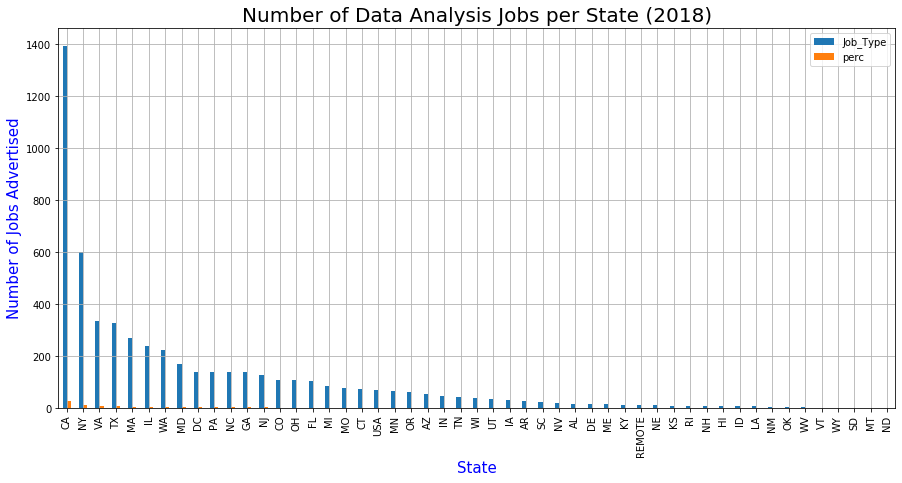

In [717]:
#create bar graph to illustrate number of Data Analysis jobs per state
fig, ax = plt.subplots(figsize=(15,7))

grouped_df=perc_values.sort_values('Job_Type', ascending = False).reset_index(drop=True)
grouped_df.plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs per State (2018)', size=20)
ax.set_xlabel(xlabel='State', color='b', size=15)
ax.set_ylabel(ylabel='Number of Jobs Advertised', color='b', size=15)
ax.set_xticklabels(grouped_df.Location)
plt.grid()
#plt.show()
plt.savefig('./images/indeed_jobs_per_state.jpg')

In [718]:
#Create Choropleth map
#Load the shape of the US States
state_geo = os.path.join('./resources/us-states.json')
#initialize the map
state_map = folium.Map(location=[37, -102], zoom_start=5)
#Add the color for the chloropleth

bins = [0, 1, 2, 4, 6, 12, 26]

state_map.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=perc_values,
    columns=['Location','perc'],
    #key_on='feature.id',
    key_on='feature.id',
    fill_color='Spectral',
    fill_opacity=0.8,
    line_opacity=0.2,
    nan_fill_color = 'white',
    bins=bins,
    legend_name="Data Analysis Jobs by State"
)
folium.LayerControl().add_to(state_map)
state_map.save("./Images/_indeed_jobs_per_state.html")
state_map



/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [719]:
indeed_industry= indeed_data[['Company_Industry','No_of_Reviews']]
indeed_industry.head()

,Company_Industry,No_of_Reviews
0,NaN,NaN
1,Internet and Software,4251.0
2,Internet and Software,4251.0
3,Internet and Software,4251.0
4,Aerospace and Defense,46.0


In [720]:
#cleanup data
indeed_industry.replace(np.NaN, 'Unkown', inplace=True)
indeed_industry.drop(indeed_industry.index[indeed_industry['Company_Industry'] == 'Unkown'], inplace = True)
indeed_industry.drop(indeed_industry.index[indeed_industry['No_of_Reviews'] == 'Unkown'], inplace = True)
indeed_industry

/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/feldtmam1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Company_Industry,No_of_Reviews
1,Internet and Software,4251
2,Internet and Software,4251
3,Internet and Software,4251
4,Aerospace and Defense,46
5,Internet and Software,641
6,Internet and Software,641
7,Internet and Software,641
9,Banks and Financial Services,988
13,Health Care,505
14,Aerospace and Defense,46


In [721]:
#Group the dataset by Industry
industry = indeed_industry.groupby('Company_Industry', as_index=False)['No_of_Reviews'].sum()
total_industries = indeed_industry['No_of_Reviews'].sum()

industry['No_of_Reviews'] = industry['No_of_Reviews'].astype(int)
industry['perc']= 100*(industry['No_of_Reviews']/total_industries)
industry

,Company_Industry,No_of_Reviews,perc
0,Aerospace and Defense,260331,1.324353
1,Agriculture and Extraction,24227,0.123247
2,Auto,88721,0.451340
3,Banks and Financial Services,2695127,13.710616
4,Computers and Electronics,260262,1.324002
5,Construction,14272,0.072604
6,Consulting and Business Services,2838969,14.442367
7,Consumer Goods and Services,196238,0.998299
8,Education and Schools,67330,0.342520
9,Energy and Utilities,36551,0.185942


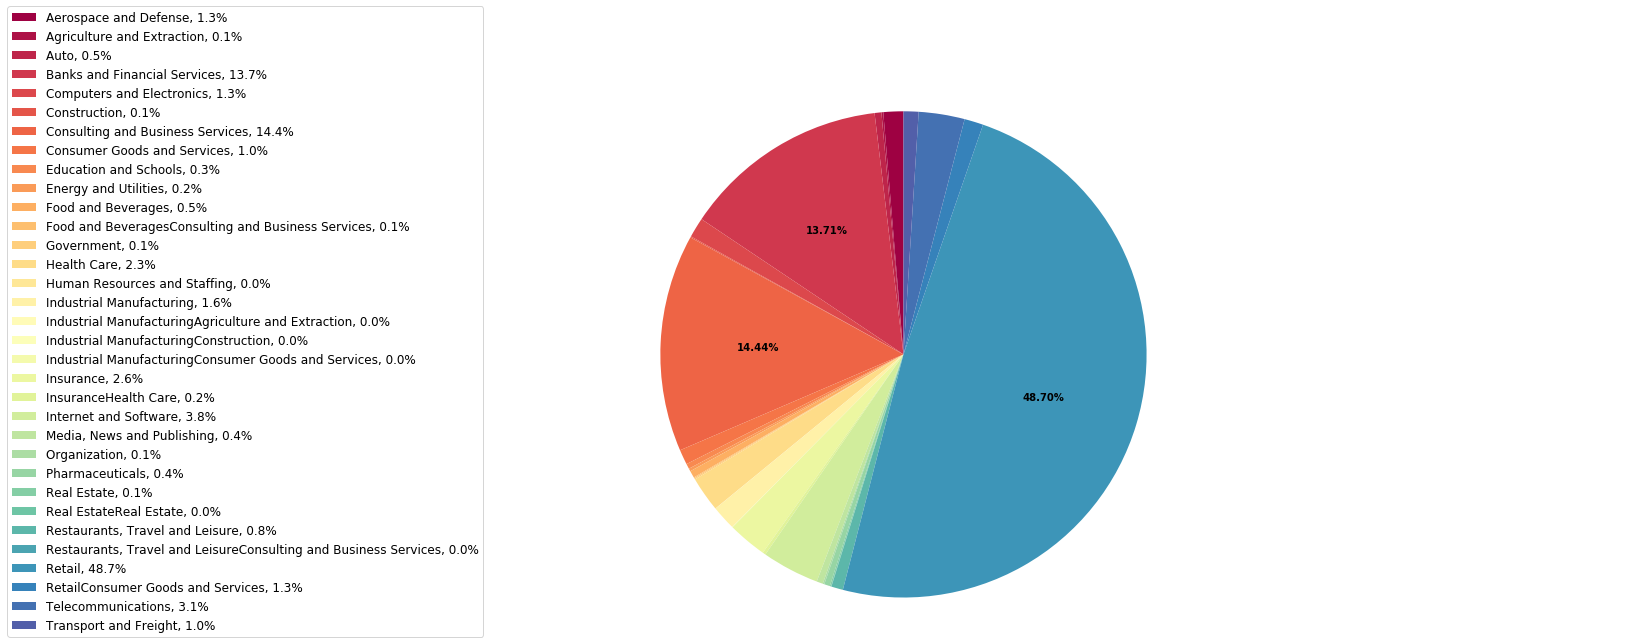

In [725]:
#jobs per industry
var=indeed_industry.groupby(['Company_Industry']).sum().stack()
temp=var.unstack()
type(temp)
x_list=temp['No_of_Reviews']
#x_list=sorted(x_list)
label_list=temp.index


def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct


NUM_COLORS = len(x_list)

fig1, ax1 = plt.subplots(figsize=(20, 10))

# set color theme
# https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib
theme = plt.get_cmap('Spectral')
ax1.set_prop_cycle("color", [theme(1. * i / len(x_list)) for i in range(len(x_list))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    x_list, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(x_list)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(label_list, x_list)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

fig1.savefig('./images/indeed_jobs_per_industry.png')


In [723]:
indeed_state = indeed_data[['Job_Type','CA','NY','VA','TX','MA','IL','WA','MD','DC','NC','Other_states']]
indeed_state.head()

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_scientist,0,0,0,0,0,0,0,0,0,0,0
1,data_scientist,1,0,0,0,0,0,0,0,0,0,0
2,data_scientist,1,0,0,0,0,0,0,0,0,0,0
3,data_scientist,1,0,0,0,0,0,0,0,0,0,0
4,data_scientist,0,0,0,0,0,0,0,0,0,0,1


In [724]:
#replace the blank values with Unknows
indeed_state.replace(np.NaN, 'Unknown', inplace=True)
indeed_state.head()

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_scientist,0,0,0,0,0,0,0,0,0,0,0
1,data_scientist,1,0,0,0,0,0,0,0,0,0,0
2,data_scientist,1,0,0,0,0,0,0,0,0,0,0
3,data_scientist,1,0,0,0,0,0,0,0,0,0,0
4,data_scientist,0,0,0,0,0,0,0,0,0,0,1


In [565]:
#Group the dataset by Job Type and State
indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC','Other_states'].sum()


,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC,Other_states
0,data_analyst,498,197,139,107,89,73,81,78,48,28,441
1,data_engineer,435,149,48,71,82,64,65,21,18,26,344
2,data_scientist,462,255,147,151,100,103,76,70,74,85,838


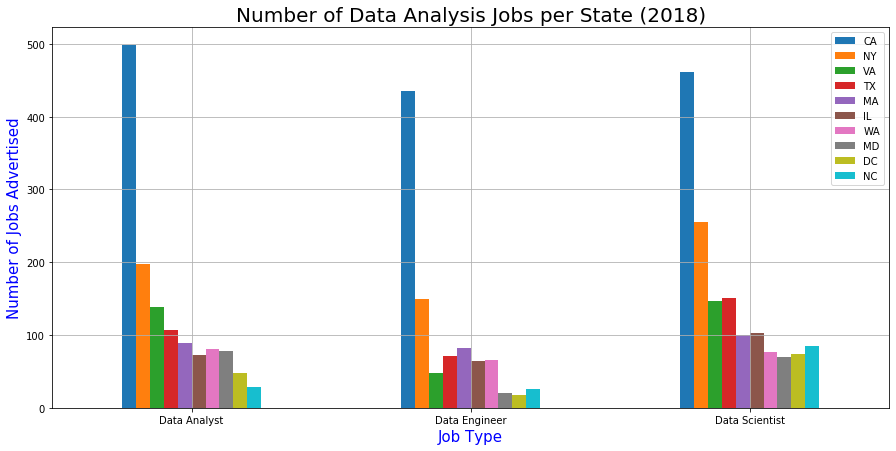

In [699]:
fig, ax = plt.subplots(figsize=(15,7))
indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC'].sum().plot(ax=ax, kind='bar')
ax.set_title('Number of Data Analysis Jobs per State (2018)', size=20)
ax.set_xlabel(xlabel='Job Type', color='b', size=15)
ax.set_ylabel(ylabel='Number of Jobs Advertised', color='b', size=15)
ax.set_xticklabels(['Data Analyst', 'Data Engineer', 'Data Scientist'],rotation=0)
plt.grid()
#plt.show()
plt.savefig('./images/indeed_types_of_jobs_per_state.jpg')

In [567]:
state_df=indeed_state.groupby('Job_Type', as_index=False)['CA','NY','VA','TX','MA','IL','WA','MD','DC','NC'].sum()
state_df

,Job_Type,CA,NY,VA,TX,MA,IL,WA,MD,DC,NC
0,data_analyst,498,197,139,107,89,73,81,78,48,28
1,data_engineer,435,149,48,71,82,64,65,21,18,26
2,data_scientist,462,255,147,151,100,103,76,70,74,85


In [568]:
#reformat dataframe to add state columns to rows
new_format_df = state_df.melt(id_vars=["Job_Type"], 
        var_name="State", 
        value_name="Value")
new_format_df

,Job_Type,State,Value
0,data_analyst,CA,498
1,data_engineer,CA,435
2,data_scientist,CA,462
3,data_analyst,NY,197
4,data_engineer,NY,149
5,data_scientist,NY,255
6,data_analyst,VA,139
7,data_engineer,VA,48
8,data_scientist,VA,147
9,data_analyst,TX,107


In [599]:
# Group data for all Data Anlysis jobs by state to use in the Choropleth map 
state_group_df=new_format_df.groupby('State', as_index=False)['Value'].sum()
state_group_df  

#calculate the percentage per state for the coropleth graph
Total_jobs = state_group_df['Value'].sum()
state_group_df_perc = state_group_df
state_group_df_perc['perc_state'] = 100*(state_group_df['Value']/Total_jobs)
state_group_df_perc

,State,Value,perc_state
0,CA,1395,36.328125
1,DC,140,3.645833
2,IL,240,6.250000
3,MA,271,7.057292
4,MD,169,4.401042
5,NC,139,3.619792
6,NY,601,15.651042
7,TX,329,8.567708
8,VA,334,8.697917
9,WA,222,5.781250


In [600]:

#Create Choropleth map
#Load the shape of the US States
state_geo = os.path.join('./resources/us-states.json')
#initialize the map
mymap = folium.Map(titles="Mapbox Bright",location=[37, -102],zoom_start=4)
bins = [0,3.5,5.8,6.3,7.1,8.7,16.0,37.0]
#Add the color for the chloropleth
mymap.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_group_df_perc,
    columns=['State','perc_state'],
    key_on='feature.id',
    fill_color='Spectral',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=bins,
    legend_name="Data Analysis Jobs by State"
)
folium.LayerControl().add_to(mymap)
mymap

# API interface section - NOT USED

In [2]:
#Get data from the USAJobs Rest API
url = "https://data.usajobs.gov/api/Search"

querystring={"PositionTitle":"Data","ResultsPerPage":"250"}
headers = {
    'authorization-key': api_key,
    'user-agent': 'marthafeldtmann@gmail.com',
    'host': "data.usajobs.gov",
    'cache-control': "no-cache",
}

#print(response)
response = requests.request("GET", url, headers=headers, params=querystring)
response=response.json()
print("Total jobs:", response['SearchResult']['SearchResultCount'])
with open("usajobs_data_file.json","w") as write_file:
    json_string = json.dumps(response)

#create empty list to be used to store data retrieved
title=[]
location=[]
organization=[]
category=[]
grade=[]
qualification=[]
salary=[]
requirements=[]
evaluations=[]
num_jobs = len(response["SearchResult"]["SearchResultItems"])
print(num_jobs)
#start the data retrieval
start = f"{'='*20}Start of Data Retrieval{'='*20}"
end = f"{'='*20}End of Data Retrieval{'='*20}"
print(start)
j=1
for i in response["SearchResult"]["SearchResultItems"]:
    try:
        print(f"Processing record {j} of {num_jobs}: {i}")
        j+=1
        response = requests.request("GET", url, headers=headers, params=querystring)
        title.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["PositionTitle"])
        location.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["PositionLocation"])
        organization.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["OrganizationName"])
        category.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["JobCategory"])
        grade.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["JobGrade"])
        qualification.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["QualificationSummary"])
        salary.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["PositionRemuniration"])
        requirements.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["UserArea"]["Requirements"])
        evaluations.append(response["SearchResult"]["SearchResultItems"]["MatchedObjectDescriptor"]["UserArea"]["Evaluations"])
        
        time.sleep(1.00)
    except:
        print(f"Missing results for {i}. Skip record")



Total jobs: 26
26
====================Start of Data Retrieval====================
Processing record 1 of 26: {'MatchedObjectId': '547168700', 'MatchedObjectDescriptor': {'PositionID': 'CIV-19-DEU-8', 'PositionTitle': 'Data Analyst', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547168700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547168700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Department of Justice', 'SubAgency': 'Civil Division/Commercial Litigation Branch/Fraud Section', 'JobCategory': [{'Name': 'Social Science', 'Code': '0101'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': 

Missing results for {'MatchedObjectId': '548017700', 'MatchedObjectDescriptor': {'PositionID': '20200011', 'PositionTitle': 'Data Analyst', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548017700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548017700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Multiple Locations', 'PositionLocation': [{'LocationName': 'Saint Louis, Missouri', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Missouri', 'CityName': 'Saint Louis, Missouri', 'Longitude': -90.19952, 'Latitude': 38.62774}, {'LocationName': 'Springfield, Virginia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Virginia', 'CityName': 'Springfield, Virginia', 'Longitude': -77.1917, 'Latitude': 38.779}], 'OrganizationName': 'National Geospatial-Intelligence Agency', 'DepartmentName': 'Department of Defense', 'JobCategory': [{'Name': 'General Mathematics And Statistics', 'Code': '1501'}], 'JobGrade': [{'Code': 'IA'}], 'Position

Missing results for {'MatchedObjectId': '548017800', 'MatchedObjectDescriptor': {'PositionID': '20200012', 'PositionTitle': 'Data Engineer', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548017800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548017800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Multiple Locations', 'PositionLocation': [{'LocationName': 'Saint Louis, Missouri', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Missouri', 'CityName': 'Saint Louis, Missouri', 'Longitude': -90.19952, 'Latitude': 38.62774}, {'LocationName': 'Springfield, Virginia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Virginia', 'CityName': 'Springfield, Virginia', 'Longitude': -77.1917, 'Latitude': 38.779}], 'OrganizationName': 'National Geospatial-Intelligence Agency', 'DepartmentName': 'Department of Defense', 'JobCategory': [{'Name': 'Information Technology Management', 'Code': '2210'}], 'JobGrade': [{'Code': 'IA'}], 'Position

Missing results for {'MatchedObjectId': '547735100', 'MatchedObjectDescriptor': {'PositionID': 'OCIO-19-10614853-MP', 'PositionTitle': 'Data Scientist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547735100', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547735100?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'District of Columbia, District of Columbia', 'PositionLocation': [{'LocationName': 'District of Columbia, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'District of Columbia, District of Columbia', 'Longitude': -77.03196, 'Latitude': 38.89037}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Department of Justice', 'SubAgency': 'Office of the Chief Information Officer', 'JobCategory': [{'Name': 'General Mathematics And Statistics', 'Code': '1501'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'Positi

Missing results for {'MatchedObjectId': '547735800', 'MatchedObjectDescriptor': {'PositionID': 'OCIO-19-10614854-DE', 'PositionTitle': 'Data Scientist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547735800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547735800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'District of Columbia, District of Columbia', 'PositionLocation': [{'LocationName': 'District of Columbia, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'District of Columbia, District of Columbia', 'Longitude': -77.03196, 'Latitude': 38.89037}], 'OrganizationName': 'Offices, Boards and Divisions', 'DepartmentName': 'Department of Justice', 'SubAgency': 'Office of the Chief Information Officer', 'JobCategory': [{'Name': 'General Mathematics And Statistics', 'Code': '1501'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'Positi

Missing results for {'MatchedObjectId': '548435700', 'MatchedObjectDescriptor': {'PositionID': 'CAZA-10627565-20-RM', 'PositionTitle': 'Medical Data Clerk', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548435700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548435700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Walla Walla, Washington', 'PositionLocation': [{'LocationName': 'Walla Walla, Washington', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Washington', 'CityName': 'Walla Walla, Washington', 'Longitude': -118.342369, 'Latitude': 46.07038}], 'OrganizationName': 'Veterans Affairs, Veterans Health Administration', 'DepartmentName': 'Department of Veterans Affairs', 'JobCategory': [{'Name': 'Miscellaneous Clerk And Assistant', 'Code': '0303'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': "To qua

Missing results for {'MatchedObjectId': '547597400', 'MatchedObjectDescriptor': {'PositionID': 'WTEV199903406488', 'PositionTitle': 'Data Quality Analyst', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547597400', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547597400?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Fort Wainwright, Alaska', 'PositionLocation': [{'LocationName': 'Fort Wainwright, Alaska', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Alaska', 'CityName': 'Fort Wainwright, Alaska', 'Longitude': -147.60257, 'Latitude': 64.8417053}], 'OrganizationName': 'U.S. Army Medical Command', 'DepartmentName': 'Department of the Army', 'SubAgency': 'PATIENT ADMINISTRATION DIVISION, MEDDAC-AK', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 

Missing results for {'MatchedObjectId': '544865400', 'MatchedObjectDescriptor': {'PositionID': 'VAR001004', 'PositionTitle': 'Data Services Librarian', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/544865400', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/544865400?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Library of Congress', 'DepartmentName': 'Legislative Branch', 'JobCategory': [{'Name': 'Librarian', 'Code': '1410'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Compflex or Flextime', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Position', 'Code': '15317'}], 'QualificationSummary': 'Applicants must have had progressi

Missing results for {'MatchedObjectId': '548128700', 'MatchedObjectDescriptor': {'PositionID': 'D-DTIC-10615336-19', 'PositionTitle': 'DATA ANALYTICS SPECIALIST', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548128700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548128700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Fort Belvoir, Virginia', 'PositionLocation': [{'LocationName': 'Fort Belvoir, Virginia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Virginia', 'CityName': 'Fort Belvoir, Virginia', 'Longitude': -77.1361847, 'Latitude': 38.68809}], 'OrganizationName': 'Defense Technical Information Center', 'DepartmentName': 'Department of Defense', 'SubAgency': 'DEFENSE TECHNICAL INFORMATION CENTER', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '1

Missing results for {'MatchedObjectId': '548129500', 'MatchedObjectDescriptor': {'PositionID': 'DTIC-10615334-19AL', 'PositionTitle': 'Data Analytics Specialist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548129500', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548129500?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Fort Belvoir, Virginia', 'PositionLocation': [{'LocationName': 'Fort Belvoir, Virginia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Virginia', 'CityName': 'Fort Belvoir, Virginia', 'Longitude': -77.1361847, 'Latitude': 38.68809}], 'OrganizationName': 'Defense Technical Information Center', 'DepartmentName': 'Department of Defense', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': 'Time in Grade:\nFor

Missing results for {'MatchedObjectId': '546602800', 'MatchedObjectDescriptor': {'PositionID': 'DE-10612557-19-ZLR', 'PositionTitle': 'DATA MANAGEMENT SPECIALIST', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546602800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546602800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Naval Station Complex, San Diego, California', 'PositionLocation': [{'LocationName': 'Naval Station Complex, San Diego, California', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'California', 'CityName': 'Naval Station Complex, San Diego, California', 'Longitude': -117.12442, 'Latitude': 32.6757}], 'OrganizationName': 'U.S. Pacific Fleet, Commander in Chief', 'DepartmentName': 'Department of the Navy', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Perma

Missing results for {'MatchedObjectId': '546843600', 'MatchedObjectDescriptor': {'PositionID': 'VAR001011', 'PositionTitle': 'Legislative Data Specialist', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546843600', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546843600?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Washington, District of Columbia', 'PositionLocation': [{'LocationName': 'Washington, District of Columbia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'District of Columbia', 'CityName': 'Washington, District of Columbia', 'Longitude': -77.032, 'Latitude': 38.8904}], 'OrganizationName': 'Library of Congress', 'DepartmentName': 'Legislative Branch', 'JobCategory': [{'Name': 'Librarian', 'Code': '1410'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Flextime, Compflex', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Position', 'Code': '15317'}], 'QualificationSummary': 'Applicants must have had progres

Missing results for {'MatchedObjectId': '547944800', 'MatchedObjectDescriptor': {'PositionID': '9R-10605849-697331-JJB', 'PositionTitle': 'TECHNICAL DATA MANAGEMENT SPECIALIST', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547944800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547944800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Robins AFB, Georgia', 'PositionLocation': [{'LocationName': 'Robins AFB, Georgia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Georgia', 'CityName': 'Robins AFB, Georgia', 'Longitude': -83.5919, 'Latitude': 32.64}], 'OrganizationName': 'Air Force Materiel Command', 'DepartmentName': 'Department of the Air Force', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': 'SPECIALIZED EXPERIENCE: 

Missing results for {'MatchedObjectId': '548097100', 'MatchedObjectDescriptor': {'PositionID': '8L-HILL-10625139-732160-SDA', 'PositionTitle': 'TECHNICAL DATA MANAGEMENT SPECIALIST', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548097100', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548097100?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Hill AFB, Utah', 'PositionLocation': [{'LocationName': 'Hill AFB, Utah', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Utah', 'CityName': 'Hill AFB, Utah', 'Longitude': -111.9896, 'Latitude': 41.1251}], 'OrganizationName': 'Air Force Materiel Command', 'DepartmentName': 'Department of the Air Force', 'SubAgency': 'AFLCMC/LZP, Announcement may be used to fill other positions at Hill AFB, UT.', 'JobCategory': [{'Name': 'Miscellaneous Administration And Program', 'Code': '0301'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Multiple Schedules', 'Code': '6'}], 'PositionOfferingType'

Missing results for {'MatchedObjectId': '548010000', 'MatchedObjectDescriptor': {'PositionID': 'WTEQ190587649591', 'PositionTitle': 'Operating Room Data Management Coordinator', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548010000', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548010000?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'El Paso, Texas', 'PositionLocation': [{'LocationName': 'El Paso, Texas', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Texas', 'CityName': 'El Paso, Texas', 'Longitude': -106.4874, 'Latitude': 31.7591}], 'OrganizationName': 'U.S. Army Medical Command', 'DepartmentName': 'Department of the Army', 'JobCategory': [{'Name': 'Miscellaneous Clerk And Assistant', 'Code': '0303'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': 'In order to qualify, you must meet the education an

Missing results for {'MatchedObjectId': '547922800', 'MatchedObjectDescriptor': {'PositionID': 'CBBM-10623686-19-ER', 'PositionTitle': 'RN Minimum Data Set Resident Assessment Coordinator', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547922800', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547922800?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Dublin, Georgia', 'PositionLocation': [{'LocationName': 'Dublin, Georgia', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Georgia', 'CityName': 'Dublin, Georgia', 'Longitude': -82.96025, 'Latitude': 32.50885}], 'OrganizationName': 'Veterans Affairs, Veterans Health Administration', 'DepartmentName': 'Department of Veterans Affairs', 'JobCategory': [{'Name': 'Nurse', 'Code': '0610'}], 'JobGrade': [{'Code': 'VN'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': "To qualify for this position, 

Missing results for {'MatchedObjectId': '546223000', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2019-0550', 'PositionTitle': 'Data Entry Clerk, GG-1531-04, DOBE-MP-DEU-External-*AMENDED', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546223000', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546223000?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Jeffersonville, Indiana', 'PositionLocation': [{'LocationName': 'Jeffersonville, Indiana', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Indiana', 'CityName': 'Jeffersonville, Indiana', 'Longitude': -85.73747, 'Latitude': 38.27913}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'GG'}], 'PositionSchedule': [{'Name': 'Competitive Service: Temporary Appointment not to exceed 08/29/2020. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full T

Missing results for {'MatchedObjectId': '547343900', 'MatchedObjectDescriptor': {'PositionID': 'CAZM-10618153-20-JD', 'PositionTitle': 'Management and Program Analyst (VISN Data Scientist)', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/547343900', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/547343900?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'San Antonio, Texas', 'PositionLocation': [{'LocationName': 'San Antonio, Texas', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Texas', 'CityName': 'San Antonio, Texas', 'Longitude': -98.49462, 'Latitude': 29.42449}], 'OrganizationName': 'Veterans Affairs, Veterans Health Administration', 'DepartmentName': 'Department of Veterans Affairs', 'SubAgency': 'VISN 17 VA Heart of Texas Health Care Network', 'JobCategory': [{'Name': 'Management And Program Analysis', 'Code': '0343'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [

Missing results for {'MatchedObjectId': '548288300', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2020-0009', 'PositionTitle': 'Data Entry Clerk, Part Time, AD-1531, Phoenix-JD-External', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548288300', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548288300?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Phoenix, Arizona', 'PositionLocation': [{'LocationName': 'Phoenix, Arizona', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Arizona', 'CityName': 'Phoenix, Arizona', 'Longitude': -112.075775, 'Latitude': 33.44826}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'AD'}], 'PositionSchedule': [{'Name': 'Excepted Service, Temporary NTE 8/29/20. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full Time', 'Code': '15318'}], 'QualificationSummary': 

Missing results for {'MatchedObjectId': '546218700', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2019-0549', 'PositionTitle': 'Data Entry Clerk, Day Shift, AD-1531, Phoenix-JD-DEU-External', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546218700', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546218700?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Phoenix, Arizona', 'PositionLocation': [{'LocationName': 'Phoenix, Arizona', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Arizona', 'CityName': 'Phoenix, Arizona', 'Longitude': -112.075775, 'Latitude': 33.44826}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'AD'}], 'PositionSchedule': [{'Name': 'Excepted Service, Temporary NTE 8/29/20. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full Time', 'Code': '15318'}], 'QualificationSummar

Missing results for {'MatchedObjectId': '548100900', 'MatchedObjectDescriptor': {'PositionID': '20CW2-WIX0008-MULT-3/4-KZ', 'PositionTitle': 'Clerk & Data Transcriber(Data Entry Clerk) *6 Month Register*', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548100900', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548100900?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Ogden, Utah', 'PositionLocation': [{'LocationName': 'Ogden, Utah', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Utah', 'CityName': 'Ogden, Utah', 'Longitude': -111.970459, 'Latitude': 41.2223663}], 'OrganizationName': 'Internal Revenue Service', 'DepartmentName': 'Department of the Treasury', 'JobCategory': [{'Name': 'Miscellaneous Clerk And Assistant', 'Code': '0303'}, {'Name': 'Mail And File', 'Code': '0305'}, {'Name': 'Data Transcriber', 'Code': '0356'}, {'Name': 'Cash Processing', 'Code': '0530'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full Time

Missing results for {'MatchedObjectId': '548286000', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2020-0025', 'PositionTitle': 'Data Entry Clerk, Part Time, GG-1531-04, DOBE-MP-DEU-External', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548286000', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548286000?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Jeffersonville, Indiana', 'PositionLocation': [{'LocationName': 'Jeffersonville, Indiana', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Indiana', 'CityName': 'Jeffersonville, Indiana', 'Longitude': -85.73747, 'Latitude': 38.27913}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'GG'}], 'PositionSchedule': [{'Name': 'Competitive Service: Temporary Appointment NTE 8/29/20. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Part Time', 'Code

Missing results for {'MatchedObjectId': '548392200', 'MatchedObjectDescriptor': {'PositionID': '20CW6-WIX0010-0356-2T4-CS', 'PositionTitle': 'Data Transcriber *SEASONAL* **6 Month Register** (Data Entry Clerk)', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548392200', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548392200?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Austin, Texas', 'PositionLocation': [{'LocationName': 'Austin, Texas', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Texas', 'CityName': 'Austin, Texas', 'Longitude': -97.743, 'Latitude': 30.2676}], 'OrganizationName': 'Internal Revenue Service', 'DepartmentName': 'Department of the Treasury', 'JobCategory': [{'Name': 'Data Transcriber', 'Code': '0356'}], 'JobGrade': [{'Code': 'GS'}], 'PositionSchedule': [{'Name': 'Full-Time', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Permanent', 'Code': '15317'}], 'QualificationSummary': 'You must meet the following requirem

Missing results for {'MatchedObjectId': '546223100', 'MatchedObjectDescriptor': {'PositionID': 'NPC-2019-0551', 'PositionTitle': 'Data Entry Clerk, Evening/Night Shift, AD-1531, Phoenix-JD-DEU-External', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/546223100', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/546223100?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Phoenix, Arizona', 'PositionLocation': [{'LocationName': 'Phoenix, Arizona', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'Arizona', 'CityName': 'Phoenix, Arizona', 'Longitude': -112.075775, 'Latitude': 33.44826}], 'OrganizationName': 'U.S. Census Bureau', 'DepartmentName': 'Department of Commerce', 'JobCategory': [{'Name': 'Statistical Assistant', 'Code': '1531'}], 'JobGrade': [{'Code': 'AD'}], 'PositionSchedule': [{'Name': 'Excepted Service, Temporary NTE 8/29/20. May be extended.', 'Code': '1'}], 'PositionOfferingType': [{'Name': 'Full Time', 'Code': '15318'}], 'Qualifica

Missing results for {'MatchedObjectId': '548101100', 'MatchedObjectDescriptor': {'PositionID': '20CW1-WIX0007-MULT-3/4-KM', 'PositionTitle': 'Clerk & Data Transcriber (Data Entry Clerk) *NTE 1 Year, 6 Month Register*', 'PositionURI': 'https://www.usajobs.gov:443/GetJob/ViewDetails/548101100', 'ApplyURI': ['https://www.usajobs.gov:443/GetJob/ViewDetails/548101100?PostingChannelID=RESTAPI'], 'PositionLocationDisplay': 'Fresno, California', 'PositionLocation': [{'LocationName': 'Fresno, California', 'CountryCode': 'United States', 'CountrySubDivisionCode': 'California', 'CityName': 'Fresno, California', 'Longitude': -119.785683, 'Latitude': 36.7406158}], 'OrganizationName': 'Internal Revenue Service', 'DepartmentName': 'Department of the Treasury', 'JobCategory': [{'Name': 'Miscellaneous Clerk And Assistant', 'Code': '0303'}, {'Name': 'Mail And File', 'Code': '0305'}, {'Name': 'Data Transcriber', 'Code': '0356'}, {'Name': 'Cash Processing', 'Code': '0530'}], 'JobGrade': [{'Code': 'GS'}], 

In [3]:
#organize the data in a dictionary to write to csv file
job_dict={ "Title":title,
          "Location":location,
          "Organization":organization,
          "Category":category,
          "Grade":grade,
          "Qualification":qualification,
          "Salary":salary,
          "Requirements":requirements,
          "Evaluations":evaluations}
#add the data to a dataframe
job_data_df=pd.DataFrame(job_dict)
print(job_dict)

{'Title': [], 'Location': [], 'Organization': [], 'Category': [], 'Grade': [], 'Qualification': [], 'Salary': [], 'Requirements': [], 'Evaluations': []}
